In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.wkt

In [2]:
#Descargamos y abrimos el archivo
comunas = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv')
display(comunas.head())

,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06
1,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06
2,MULTIPOLYGON (((-58.4883373673246 -34.62016035...,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
3,MULTIPOLYGON (((-58.498384839883 -34.596367656...,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
4,MULTIPOLYGON (((-58.5033113250844 -34.59385615...,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07


In [3]:
#transformamos la columna WKT
comunas['WKT'] = comunas['WKT'].apply(shapely.wkt.loads)
display(comunas.head())

,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,(POLYGON ((-58.3800038855693 -34.5700235247202...,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06
1,(POLYGON ((-58.4306058283309 -34.6070470885963...,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06
2,(POLYGON ((-58.4883373673246 -34.6201603572932...,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
3,"(POLYGON ((-58.498384839883 -34.5963676568872,...",7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
4,(POLYGON ((-58.5033113250844 -34.5938561595894...,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07


In [4]:
#Creamos las geoColumnas
geo_comunas = gpd.GeoDataFrame(comunas, geometry='WKT')
display(geo_comunas.head())

,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...",1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06
1,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06
2,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820...",6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
3,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718...",7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
4,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347...",8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07


0      Annotation(-58.3949, -34.5858, '2.0')
1      Annotation(-58.4436, -34.6168, '6.0')
2     Annotation(-58.5029, -34.6278, '10.0')
3     Annotation(-58.4969, -34.6061, '11.0')
4     Annotation(-58.4904, -34.5663, '12.0')
5     Annotation(-58.4223, -34.5739, '14.0')
6     Annotation(-58.4628, -34.5919, '15.0')
7     Annotation(-58.4541, -34.5545, '13.0')
8      Annotation(-58.3888, -34.6423, '4.0')
9      Annotation(-58.4206, -34.6174, '5.0')
10     Annotation(-58.4519, -34.6365, '7.0')
11     Annotation(-58.4027, -34.6138, '3.0')
12     Annotation(-58.4991, -34.6517, '9.0')
13     Annotation(-58.4622, -34.6745, '8.0')
14     Annotation(-58.3717, -34.6063, '1.0')
dtype: object

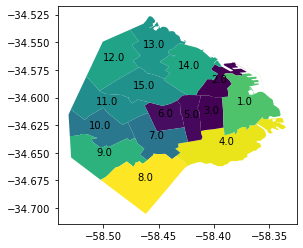

In [5]:
fig, ax = plt.subplots()
geo_comunas.plot(ax=ax, column='AREA')
geo_comunas.apply(lambda x: ax.annotate(text=x['COMUNAS'], xy=x.WKT.centroid.coords[0], ha='center'), axis=1)

In [6]:
#vamos a leer el dataset de arbolado

arboles = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv')
arboles.head()

C:\Users\TZ182CG\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [7]:
#generamos el geopandas asociado

geo_arboles = gpd.GeoDataFrame(arboles,geometry = gpd.points_from_xy(arboles.long,arboles.lat))
geo_arboles.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,geometry
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,POINT (-58.37856 -34.59490)
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0,POINT (-58.38153 -34.59232)
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,POINT (-58.37910 -34.59194)
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,POINT (-58.38071 -34.59155)
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0,POINT (-58.38071 -34.59155)


<AxesSubplot:>

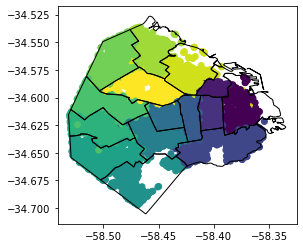

In [9]:
#Probamos graficar los puntos en cada comuna
fig, ax = plt.subplots()

geo_arboles.sample(10000).plot(ax=ax,column='comuna')
geo_comunas.plot(ax=ax,facecolor='none',edgecolor='black')

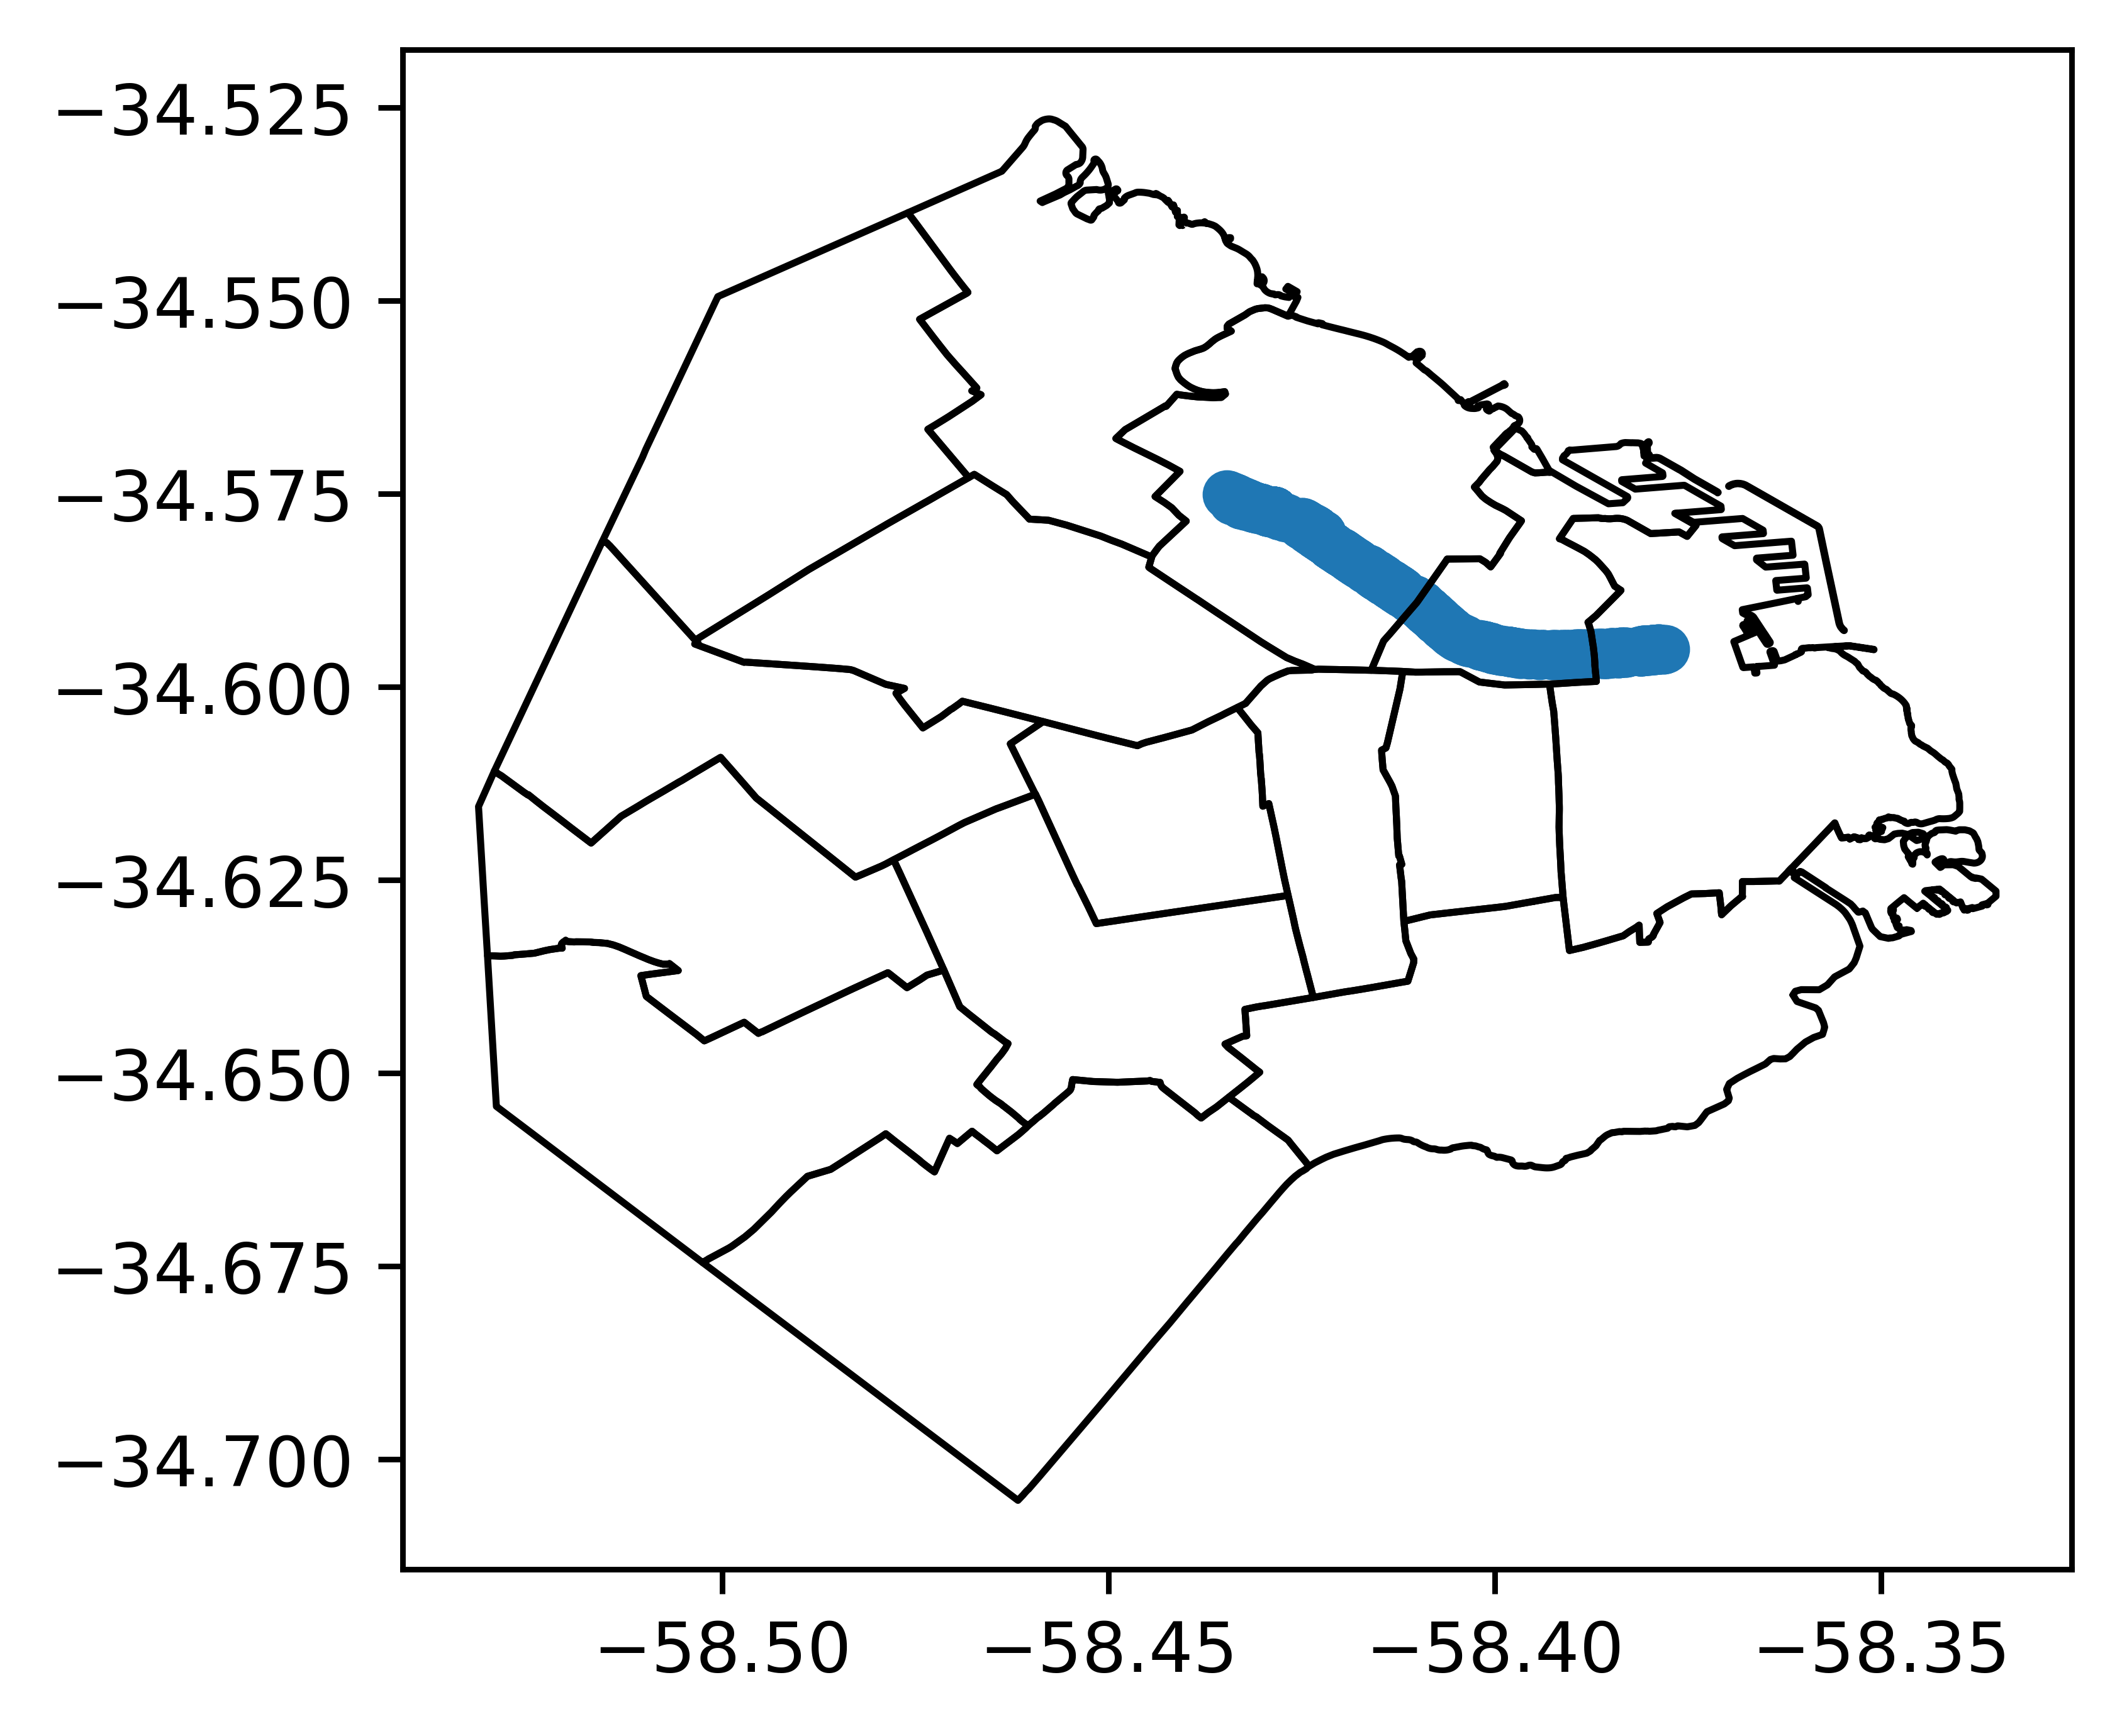

In [10]:
# Queremos ahora marcar una calle, por ejemplo Av Santa Fe, para eso vamos a buscar los extremos filtrando los datos de los arboles que esten en esa calle y buscando las alturas maximas y minima

geo_arboles_stafe = geo_arboles[geo_arboles['calle_nombre']=='Santa Fe Av.']

fig, ax = plt.subplots(dpi=800)
geo_arboles_stafe.plot(ax=ax)
geo_comunas.plot(ax=ax, facecolor='none', edgecolor='black')

plt.savefig('santafe.png', dpi=800)

In [11]:
list(geo_arboles['calle_nombre'].unique())

['Esmeralda',
 'Pellegrini Carlos',
 'Arroyo',
 'Reconquista',
 'Juncal',
 'Cerrito',
 'Suipacha',
 'Rodriguez Peña',
 'Bouchard',
 'Callao Av.',
 'Córdoba Av.',
 'Além Leandro N. Av.',
 'Tucumán',
 'Lavalle',
 'Montevideo',
 'San Martín',
 'Sarmiento',
 'De Mayo Av.',
 'Castillo Ramón S. Pte. Av',
 'Garay Juan de, Av',
 'Perú',
 'Uruguay',
 'Libertad',
 'Lima',
 'Guido',
 'Parera',
 'Quintana Manuel Presidente Av.',
 'Güemes Macacha ',
 'Trinidad Guevara',
 'Dealessi Pierina',
 'Cevallos Virrey',
 'Irigoyen Bernardo de',
 'Estados Unidos',
 'Calvo Carlos',
 'Chacabuco',
 'Solís',
 'Humberto Primo',
 'Azopardo',
 'Belgrano Av.',
 'Talcahuano',
 'Paseo Colón Av.',
 'Maipú',
 'Cabral Sargento',
 'Del Libertador, Av',
 'Saenz Peña Roque,Pres. Diagonal Norte Av. ',
 'Santa Fe Av.',
 'Arenales',
 'Cochabamba',
 'San Juan Av.',
 'Corrientes Av.',
 'Piedras',
 'Moreau  de Justo Alicia Av.',
 'Madero Eduardo Av.',
 'Dealessi Pierina ',
 'Moreno',
 'De la Barra Emma',
 'Sánchez de Thompson Mari

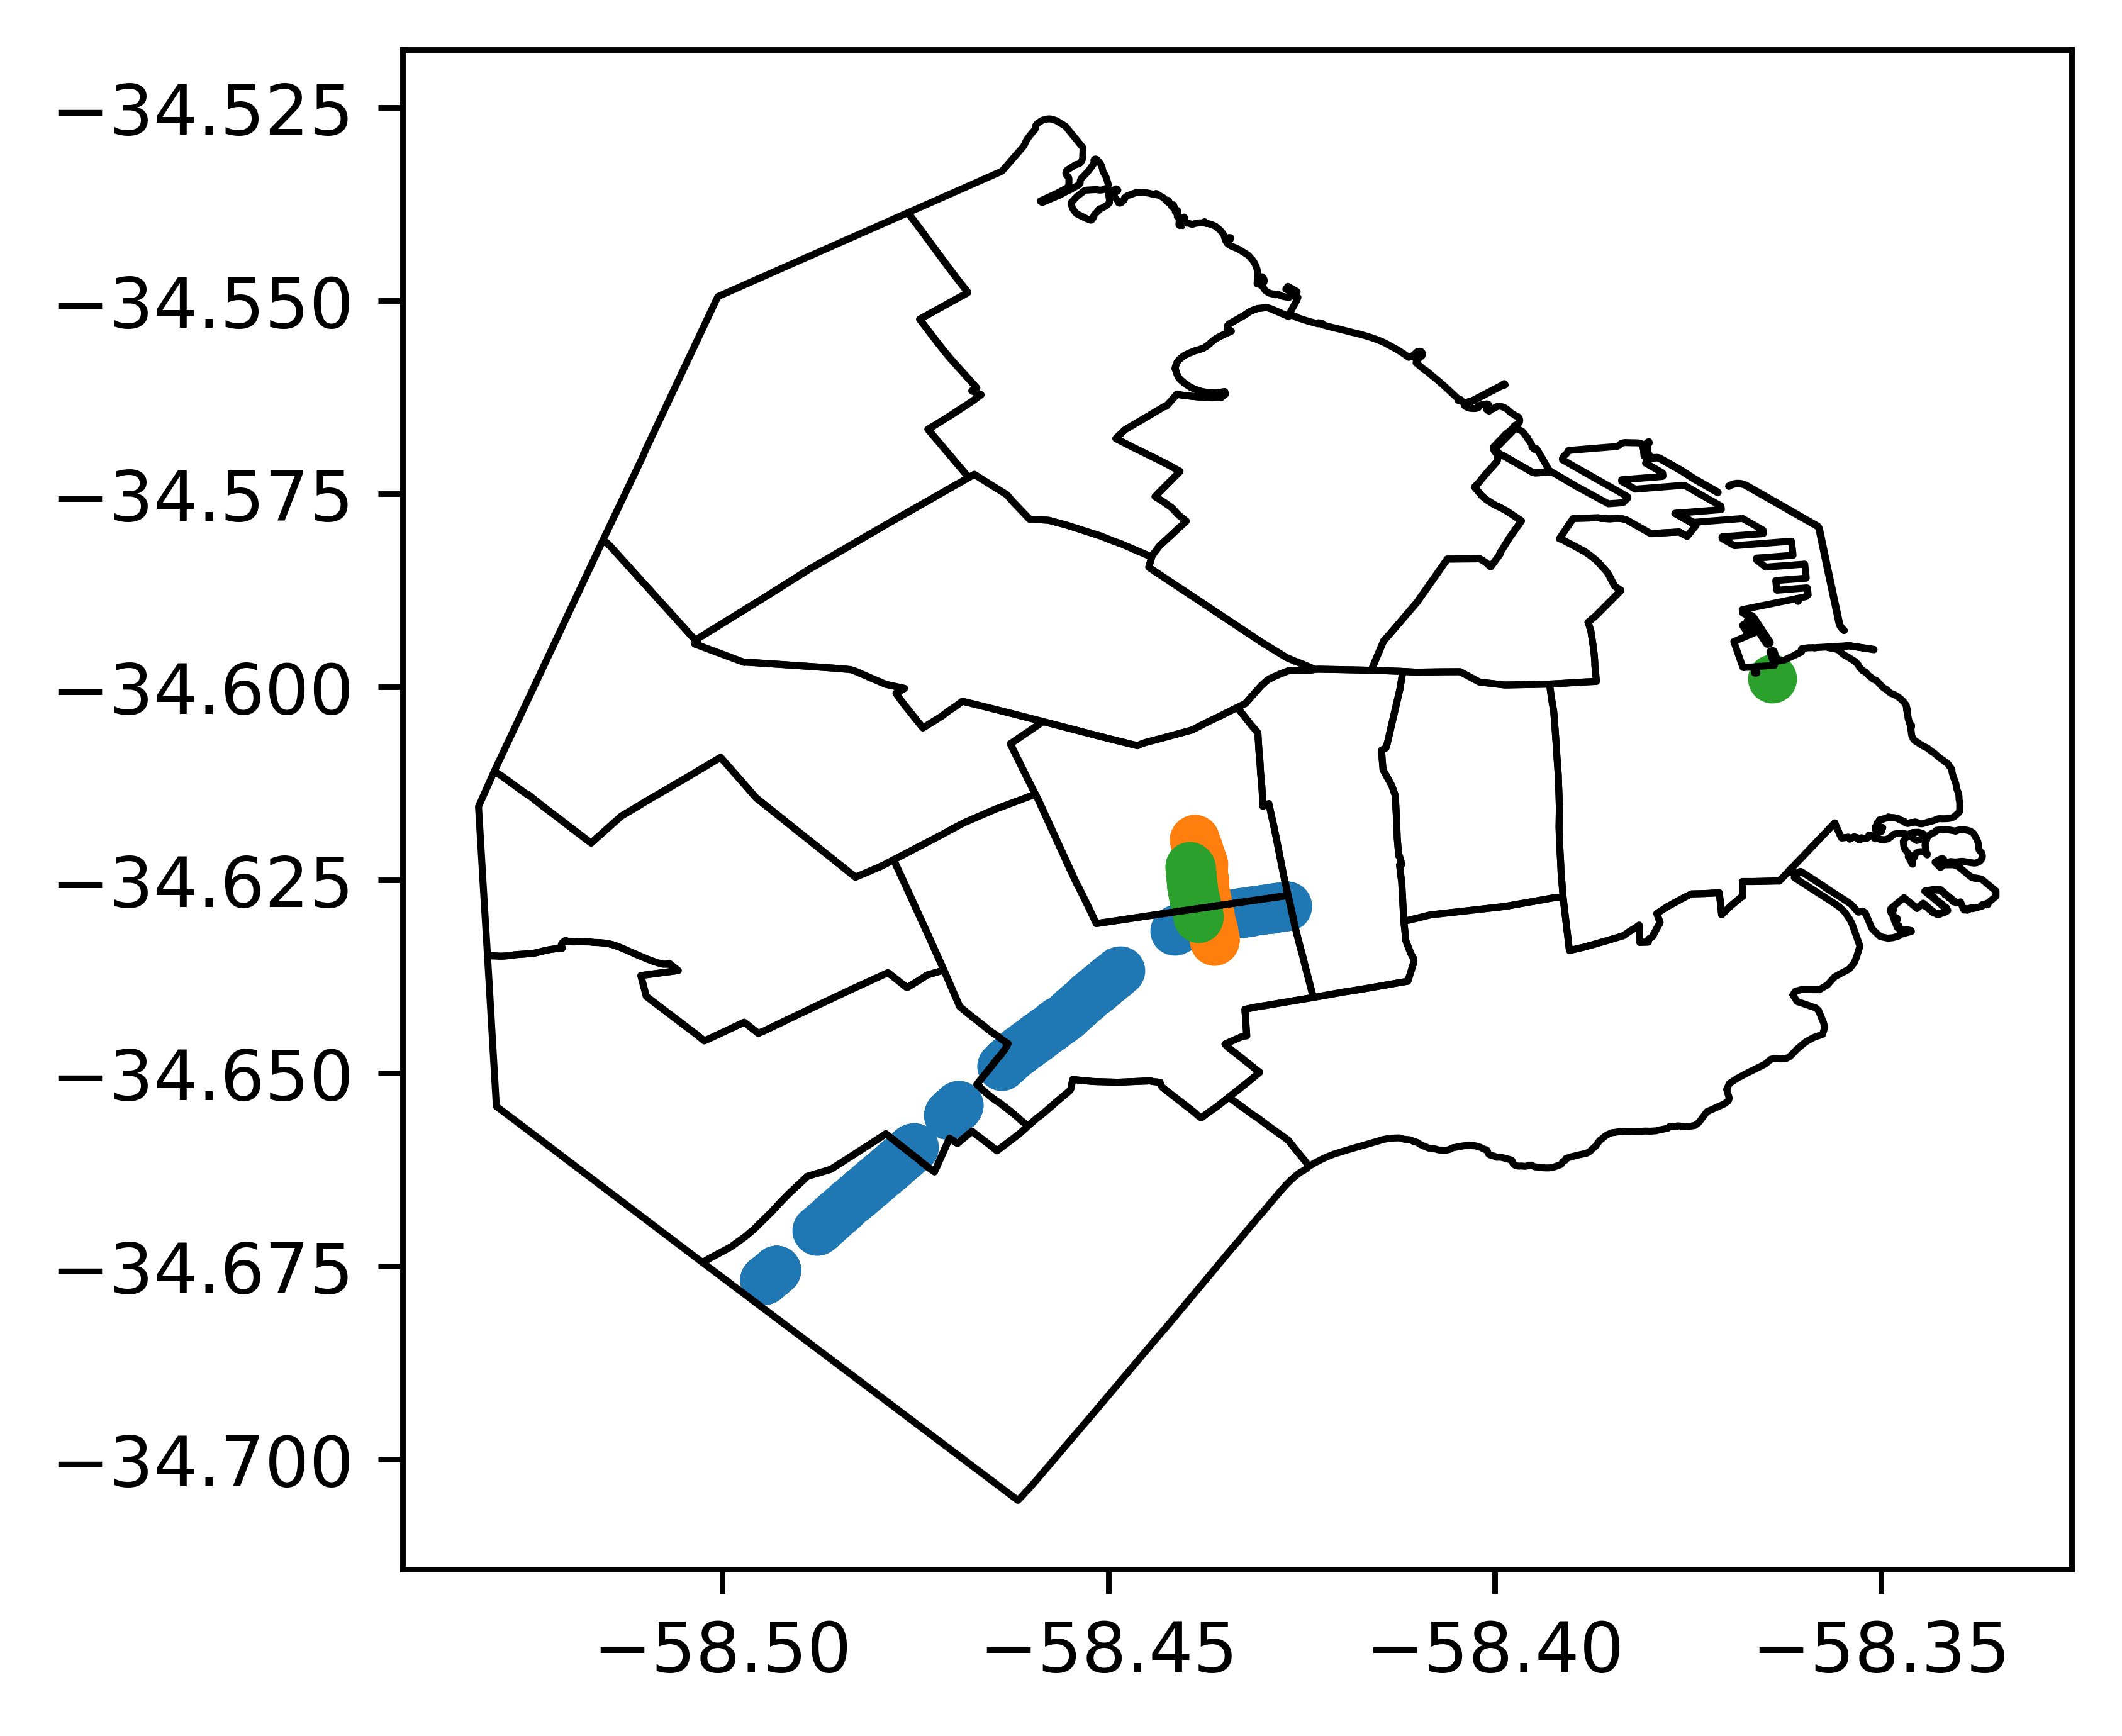

In [15]:
# Queremos ahora marcar una calle, por ejemplo Av Santa Fe, para eso vamos a buscar los extremos filtrando los datos de los arboles que esten en esa calle y buscando las alturas maximas y minima

geo_arboles_zuv = geo_arboles[geo_arboles['calle_nombre']=='Zuviría']
geo_arboles_calazans = geo_arboles[geo_arboles['calle_nombre']=='San José de Calasanz']
geo_arboles_thompson = geo_arboles[geo_arboles['calle_nombre']=='Thompson']

fig, ax = plt.subplots(dpi=800)

geo_arboles_zuv.plot(ax=ax)
geo_arboles_calazans.plot(ax=ax)
geo_arboles_thompson.plot(ax=ax)

geo_comunas.plot(ax=ax, facecolor='none', edgecolor='black')

plt.savefig('zuviria.png', dpi=800)

C:\Users\TZ182CG\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

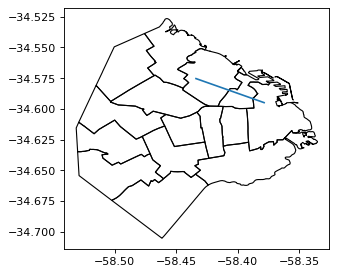

In [20]:
#Buscamos ahora los extremos
from shapely.geometry import LineString
from shapely.geometry import Point

# geo_arboles_corrientes["calle_altura"].max() #Ver que da error porque hay nans

geo_arboles_stafe = geo_arboles[geo_arboles["calle_nombre"] == "Santa Fe Av."]
#geo_arboles_stafe = geo_arboles_stafe.dropna()
geo_arboles_stafe["calle_chapa"] = geo_arboles_stafe["calle_chapa"].astype('float')

geo_arboles_stafe = geo_arboles_stafe.sort_values("calle_chapa")
#partida = geo_arboles_corrientes[geo_arboles_corrientes["calle_altura"]==geo_arboles_corrientes["calle_altura"].min()].geometry
#llegada = geo_arboles_corrientes[geo_arboles_corrientes["calle_altura"]==geo_arboles_corrientes["calle_altura"].max()].geometry

geo_arboles_stafe = geo_arboles_stafe[:-geo_arboles_stafe["calle_chapa"].isna().sum()] # Nos sacamos de encima los datos que no figuran 

# Es molesto que hay que pasar a points
type(geo_arboles_stafe["geometry"].iloc[0])
linea = LineString([geo_arboles_stafe["geometry"].iloc[0],geo_arboles_stafe["geometry"].iloc[-1]])

geo_linea = gpd.GeoSeries([linea])

fig, ax = plt.subplots(dpi=80)

geo_linea.plot(ax=ax)
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')



<AxesSubplot:>

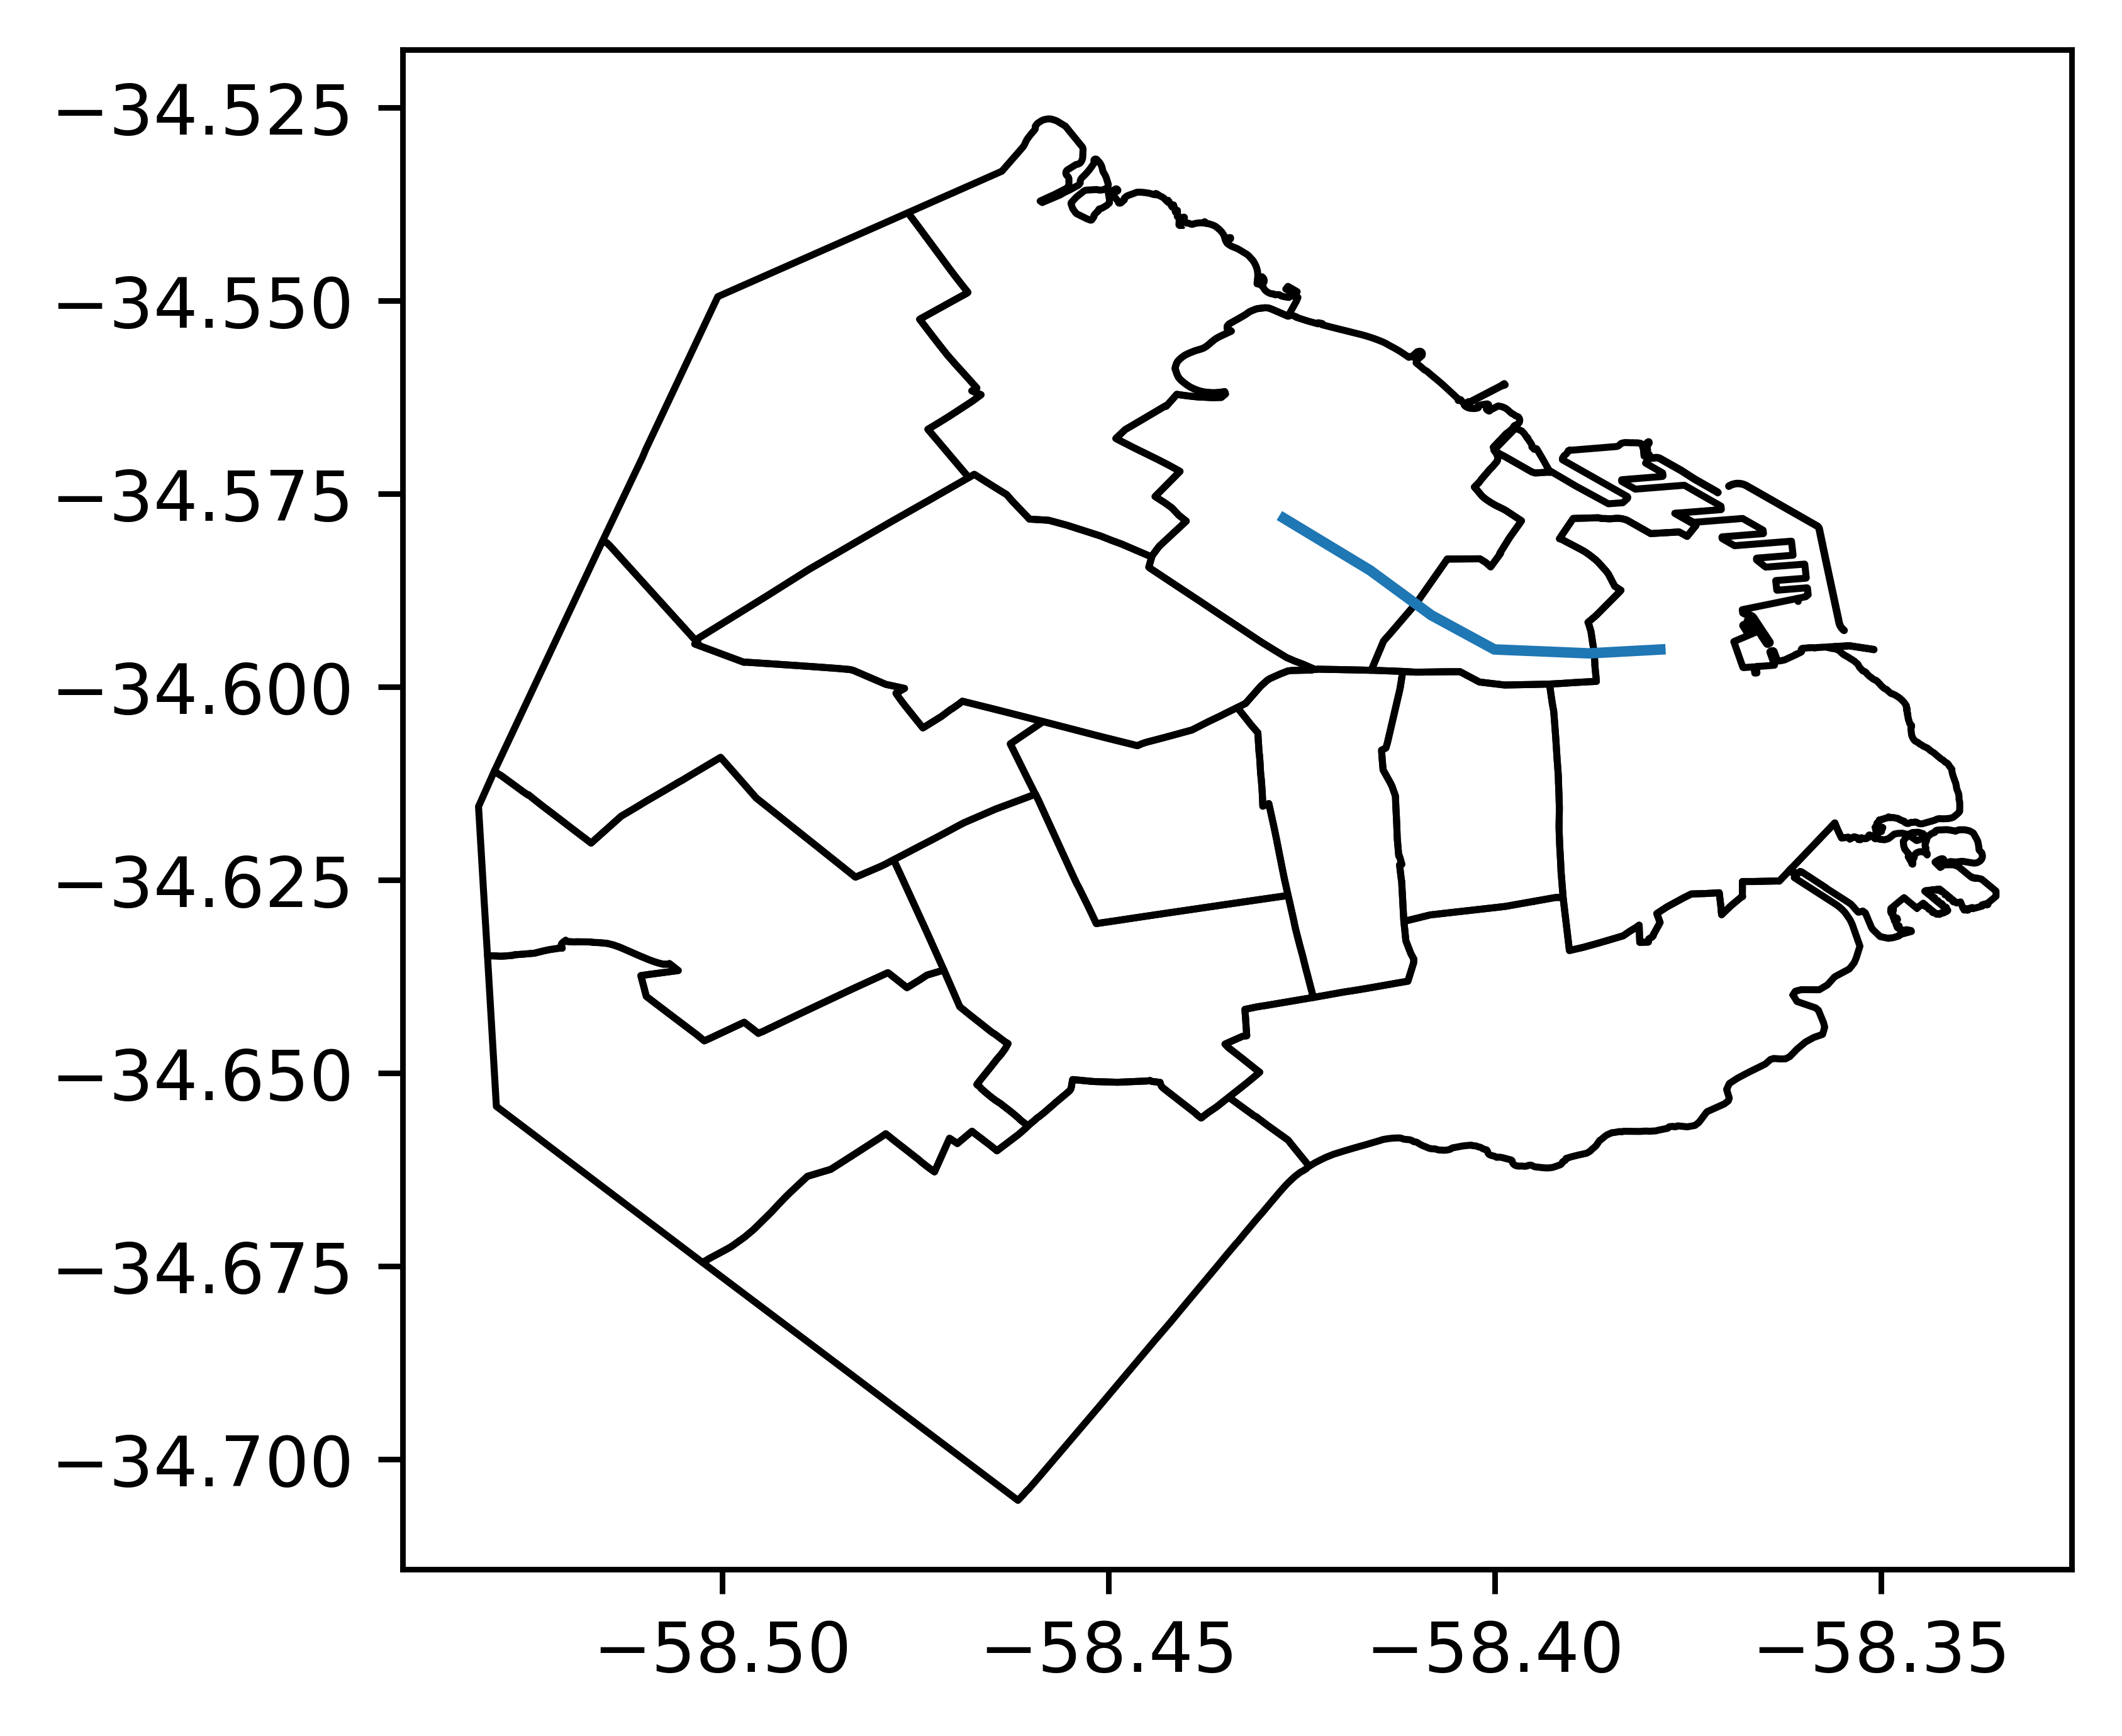

In [23]:
# Ahora le vamos a agregar resolucion

n = 100
puntos = geo_arboles_stafe["geometry"][0::n].to_list()

linea = LineString(puntos)
geo_linea = gpd.GeoSeries(linea)

fig, ax = plt.subplots(dpi=800)

geo_linea.plot(ax=ax)
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')

<AxesSubplot:>

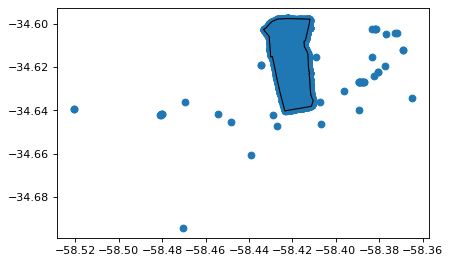

In [24]:
# Ahora queremos validar si los arboles estan marcados en la comuna correcta. Como son muchos datos vamos a trabajar solo con una comuna.

comuna = 5

geo_comunas_seleccionada = geo_comunas[geo_comunas["COMUNAS"]==comuna]
geo_arbolado_comuna_seleccionada = geo_arboles[geo_arboles["comuna"] == comuna]


fig, ax = plt.subplots(dpi=80)

geo_arbolado_comuna_seleccionada.plot(ax=ax)
geo_comunas_seleccionada.plot(ax=ax, facecolor="none", edgecolor='black')

In [25]:
geometria = geo_comunas_seleccionada["WKT"]

for i in geo_arbolado_comuna_seleccionada.index:
    geo_arbolado_comuna_seleccionada.loc[i,"pertenece"] = geometria.contains(geo_arbolado_comuna_seleccionada.loc[i, 'geometry']).iloc[0]


C:\Users\TZ182CG\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\TZ182CG\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

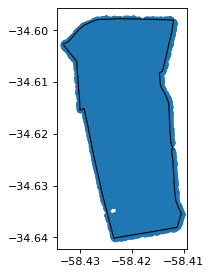

In [26]:
fig, ax = plt.subplots(dpi=80)

geo_arbolado_comuna_seleccionada[geo_arbolado_comuna_seleccionada["pertenece"]==True].plot(ax=ax)
geo_comunas_seleccionada.plot(ax=ax, facecolor="none", edgecolor='black')

In [27]:
geo_comunas.crs
geo_comunas.crs = {'init' :'epsg:4326'}
geo_comunas_m = geo_comunas.copy()
geo_comunas_m = geo_comunas_m.to_crs({'init': 'epsg:6933'})

C:\Users\TZ182CG\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [28]:
# Vamos a resolver la pregunta de la densidad de arboles

for i in geo_comunas.index:
    arboles_en_comuna = len(geo_arboles[geo_arboles["comuna"]==geo_comunas.loc[i,"COMUNAS"]])
    geo_comunas.loc[i,"arboles"] = arboles_en_comuna
    area = geo_comunas_m.loc[i,"WKT"].area
    geo_comunas.loc[i,"area"] = area

geo_comunas["densidad"] = geo_comunas["arboles"]/geo_comunas["area"]

geo_comunas


,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,arboles,area,densidad
0,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...",1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,7115.0,6.317259e+06,0.001126
1,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,15591.0,6.851031e+06,0.002276
2,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820...",6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,33421.0,1.265656e+07,0.002641
3,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718...",7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,37340.0,1.412011e+07,0.002644
4,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347...",8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,38818.0,1.557094e+07,0.002493
5,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676...",9,LIMITE COMUNAL,14.0,PALERMO,22126.531858,1.584587e+07,22417.0,1.584587e+07,0.001415
6,"MULTIPOLYGON (((-58.42602 -34.59661, -58.42484...",11,LIMITE COMUNAL,15.0,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,17832.585580,1.432290e+07,29587.0,1.432290e+07,0.002066
7,"MULTIPOLYGON (((-58.44033 -34.54022, -58.44032...",15,LIMITE COMUNAL,13.0,BELGRANO - COLEGIALES - NUÑEZ,26198.826953,1.471321e+07,28287.0,1.471322e+07,0.001923
8,"MULTIPOLYGON (((-58.38864 -34.63373, -58.38864...",13,LIMITE COMUNAL,4.0,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,35423.282799,2.168464e+07,32346.0,2.168463e+07,0.001492
9,"MULTIPOLYGON (((-58.43333 -34.60267, -58.43314...",2,LIMITE COMUNAL,5.0,ALMAGRO - BOEDO,12323.432479,6.660603e+06,15224.0,6.660603e+06,0.002286
